In [22]:
import pandas as pd

df_wifi = pd.read_csv('privamov/privamov-wifi', sep='\t', nrows=10000000, header=None, names=['id', 'timestamp','wifi'], parse_dates=['timestamp'], index_col='timestamp')

In [23]:
df_wifi

,id,wifi
timestamp,,
2014-10-06 12:56:50.500,1,84:a6:c8:a9:c2:d9
2014-10-06 12:56:50.510,1,9c:1c:12:24:b4:d1
2014-10-06 12:56:50.515,1,9c:1c:12:24:af:31
2014-10-06 12:56:50.516,1,9c:1c:12:2b:c3:f1
2014-10-04 19:43:14.986,1,20:e5:2a:5b:bf:e0
...,...,...
2015-04-17 11:54:21.940,8,24:de:c6:49:ed:21
2015-04-17 11:54:21.941,8,00:0b:86:86:0f:60
2015-04-17 11:54:21.941,8,00:1a:1e:c4:7b:e1


In [24]:
df_wifi_timerange= df_wifi.between_time('22:00', '6:00')
df_wifi_timerange

,id,wifi
timestamp,,
2014-11-24 22:08:57.154,6,00:17:33:78:a0:f8
2014-11-24 22:08:57.168,6,a2:17:33:78:a0:fb
2014-11-24 22:08:57.184,6,a2:17:33:78:a0:f9
2014-11-24 22:08:57.203,6,52:1f:9f:f5:d2:a4
2014-11-24 22:08:57.229,6,00:1f:9f:f5:d2:a7
...,...,...
2015-04-17 03:34:33.819,8,f4:ca:e5:e6:97:6d
2015-04-17 04:07:57.234,8,00:19:70:b5:d9:37
2015-04-17 04:07:57.234,8,40:5a:9b:53:36:13


In [25]:
df_wifi_update=pd.DataFrame({'count' : df_wifi_timerange.groupby( [ "wifi", "id"] ).size()}).reset_index()
df_wifi_update

,wifi,id,count
0,00:01:36:58:e0:54,22,2
1,00:02:6f:32:d5:2c,41,6
2,00:02:6f:87:2e:2b,8,19
3,00:02:6f:e6:d3:4a,1,6
4,00:02:6f:e6:d6:9c,1,4
...,...,...,...
39939,fe:c2:de:50:2a:16,1,2
39940,fe:df:a8:cf:e4:37,17,2
39941,fe:df:a8:d2:f4:dd,8,2
39942,fe:df:a8:d4:6f:61,8,2


In [26]:
value_counts = df_wifi_update['wifi'].value_counts()

# solution here
df_val_counts = pd.DataFrame(value_counts)
df_value_counts = df_val_counts.reset_index()
df_value_counts.columns = ['wifi_unique', 'Nb_Id'] 

In [27]:
df_value_counts

,wifi_unique,Nb_Id
0,56:01:70:a4:17:86,22
1,56:01:70:a4:17:84,22
2,0e:76:6b:29:10:48,21
3,56:01:70:a4:17:87,21
4,52:f2:79:19:0b:7a,20
...,...,...
32782,5c:33:8e:9c:ea:a7,1
32783,00:24:d4:ce:e1:be,1
32784,0e:53:5e:26:f1:f4,1
32785,06:19:70:ae:b4:a0,1


In [28]:
for i in range(len(df_wifi_update)):
    if(int(df_value_counts[ df_value_counts['wifi_unique'] == df_wifi_update["wifi"][i] ]["Nb_Id"]) == 1 ) :
        df_wifi_update=df_wifi_update.drop([i])




    

In [29]:
value_counts = df_wifi_update['wifi'].value_counts()

# solution here
df_val_counts = pd.DataFrame(value_counts)
df_value_counts = df_val_counts.reset_index()
df_value_counts.columns = ['wifi_unique', 'Nb_Id'] 
df_val_counts

,wifi
56:01:70:a4:17:84,22
56:01:70:a4:17:86,22
0e:76:6b:29:10:48,21
56:01:70:a4:17:87,21
52:f2:79:19:0b:7a,20
...,...
00:1a:1e:c9:ab:44,2
d6:36:8a:b2:65:a3,2
68:15:90:1a:8f:2c,2
64:31:50:ed:39:b0,2


In [30]:
""" a=df_wifi_update[df_wifi_update["wifi"] == "9c:1c:12:2b:c3:f1"]

df_val_counts = pd.DataFrame(a)
df_value_counts_test = df_val_counts.reset_index()
df_value_counts_test.columns = ['supprimer','wifi','id', 'count'] 
df_value_counts_test=df_value_counts_test.drop(columns=["supprimer"])
 """

' a=df_wifi_update[df_wifi_update["wifi"] == "9c:1c:12:2b:c3:f1"]\n\ndf_val_counts = pd.DataFrame(a)\ndf_value_counts_test = df_val_counts.reset_index()\ndf_value_counts_test.columns = [\'supprimer\',\'wifi\',\'id\', \'count\'] \ndf_value_counts_test=df_value_counts_test.drop(columns=["supprimer"])\n '

In [31]:
"""df_value_counts_test"""

'df_value_counts_test'

In [32]:
final = pd.DataFrame(columns = ['ID1', 'ID2', 'length','wifi'])

In [33]:
s=0
for wifi in range(len(df_value_counts)):
    element= df_wifi_update[df_wifi_update["wifi"] == df_value_counts['wifi_unique'][wifi]]
    df_val_counts = pd.DataFrame(element)
    df_value_counts_test = df_val_counts.reset_index()
    df_value_counts_test.columns = ['supprimer','wifi','id', 'count'] 
    df_value_counts_test=df_value_counts_test.drop(columns=["supprimer"])
    for i in range(len(df_value_counts_test)):
        j=i+1
        while(j <len(df_value_counts_test)):
            final.loc[s]=[df_value_counts_test["id"][i],df_value_counts_test["id"][j],min(df_value_counts_test["count"][i],df_value_counts_test["count"][j]),df_value_counts_test["wifi"][i]]
            j=j+1
            s+=1

        

In [34]:
final

,ID1,ID2,length,wifi
0,1,2,36,56:01:70:a4:17:84
1,1,6,150,56:01:70:a4:17:84
2,1,7,150,56:01:70:a4:17:84
3,1,8,150,56:01:70:a4:17:84
4,1,15,150,56:01:70:a4:17:84
...,...,...,...,...
17309,15,41,10,00:1a:1e:c9:ab:44
17310,8,23,2,d6:36:8a:b2:65:a3
17311,67,69,2,68:15:90:1a:8f:2c
17312,1,24,4,64:31:50:ed:39:b0


## On a compté pour chaque paire d'ID le nombre minimum de fois qu'ils croisent le même réseau wifi
## On peut trier par taille pour voir entre 22 et 6h quel "couple" se voit le plus et près de quelle(s) wifi : ils pourraient etre colocataires, amants...

In [35]:
final_sorted = final.sort_values(by=['length'], ascending=False)
final_sorted.head(20)

,ID1,ID2,length,wifi
9107,24,58,1463,14:75:90:39:d9:d6
13272,24,58,1231,14:cf:92:75:60:10
42,6,8,1166,56:01:70:a4:17:84
60,7,8,1134,56:01:70:a4:17:84
41,6,7,1134,56:01:70:a4:17:84
273,6,8,1018,56:01:70:a4:17:86
712,6,8,1009,56:01:70:a4:17:87
2383,1,8,912,5a:6c:16:f8:80:5b
3073,1,8,888,5a:6c:16:f8:80:58
1991,1,8,865,5a:6c:16:f8:80:5a


In [36]:
resultt=pd.DataFrame({'Nbre-repeat' : final.groupby( [ "ID1", "ID2"] ).size()}).reset_index()

result=final.groupby(['ID1', 'ID2']).sum()['length'].reset_index()

In [37]:
resultt

,ID1,ID2,Nbre-repeat
0,1,2,133
1,1,5,18
2,1,6,141
3,1,7,19
4,1,8,197
...,...,...,...
781,73,81,3
782,74,78,4
783,81,82,2
784,81,83,2


In [38]:
result

,ID1,ID2,length
0,1,2,614
1,1,5,5590
2,1,6,1758
3,1,7,592
4,1,8,4939
...,...,...,...
781,73,81,9
782,74,78,7
783,81,82,10
784,81,83,4


In [39]:
result_sorted = result.sort_values(by=['length'], ascending=False)
result_sorted

,ID1,ID2,length
177,8,35,7331
1,1,5,5590
4,1,8,4939
93,6,8,3917
465,24,58,2783
...,...,...,...
76,2,58,1
705,52,67,1
718,55,67,1
599,41,74,1


In [40]:

import networkx as nx

G = nx.from_pandas_edgelist(df=result, source='ID1', target='ID2', edge_attr='length')

G.add_nodes_from(nodes_for_adding=result.ID1.tolist())

In [41]:
G.edges(data=True)

 {'length': 204}), (1, 15, {'length': 723}), (1, 16, {'length': 580}), (1, 17, {'length': 259}), (1, 19, {'length': 12}), (1, 20, {'length': 200}), (1, 22, {'length': 24}), (1, 23, {'length': 723}), (1, 24, {'length': 732}), (1, 25, {'length': 12}), (1, 30, {'length': 8}), (1, 32, {'length': 242}), (1, 33, {'length': 56}), (1, 34, {'length': 474}), (1, 35, {'length': 176}), (1, 38, {'length': 45}), (1, 41, {'length': 451}), (1, 42, {'length': 6}), (1, 43, {'length': 336}), (1, 44, {'length': 2064}), (1, 49, {'length': 78}), (1, 50, {'length': 827}), (1, 51, {'length': 183}), (1, 52, {'length': 18}), (1, 53, {'length': 64}), (1, 55, {'length': 42}), (1, 57, {'length': 13}), (1, 58, {'length': 15}), (1, 59, {'length': 88}), (1, 62, {'length': 36}), (1, 65, {'length': 107}), (1, 66, {'length': 86}), (1, 67, {'length': 730}), (1, 69, {'length': 528}), (1, 72, {'length': 116}), (1, 73, {'length': 817}), (1, 74, {'length': 10}), (1, 78, {'length': 38}), (1, 81, {'length': 105}), (1, 82, {'le

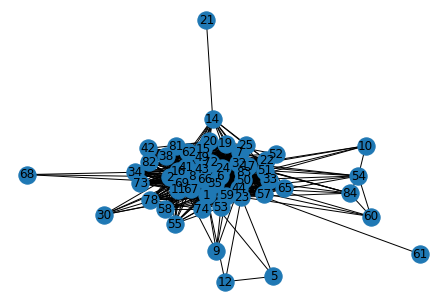

In [42]:
weights = [i['length']/100 for i in dict(G.edges).values()]

nx.draw(G, with_labels = True)